In [122]:
import pandas as pd
import numpy as np
import datetime 
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [123]:
#reading dataset

base_data = pd.read_csv(r'D:\Downloads\Data.csv')
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [124]:
base_data.shape


(110527, 14)

In [125]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [126]:
#modifying the date and time into standard form 
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.normalize()
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.normalize()
base_data.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [127]:
# 5 is Saturday, 6 is Sunday 

base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [128]:
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [129]:
base_data['sch_weekday'].value_counts().sort_values(ascending=True)



5       24
3    18073
4    18915
0    23085
2    24262
1    26168
Name: sch_weekday, dtype: int64

In [130]:
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [131]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [132]:
#changing the name of some cloumns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [133]:
# dropping some columns which have no significance
base_data.drop(['AppointmentID', 'Neighbourhood'], axis=1, inplace=True)
base_data.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,4,4
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No,4,4
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No,4,4
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No,4,4
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No,4,4


In [134]:
base_data.describe()

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


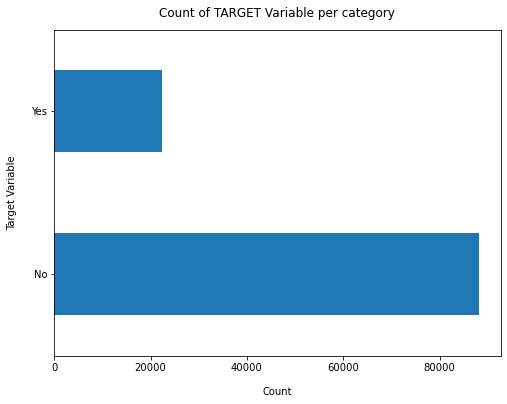

In [135]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [136]:
# calculating the % of appointments came or not 
#Frequency / Total = Probability
#Probability * 100 = Percentage
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

D:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


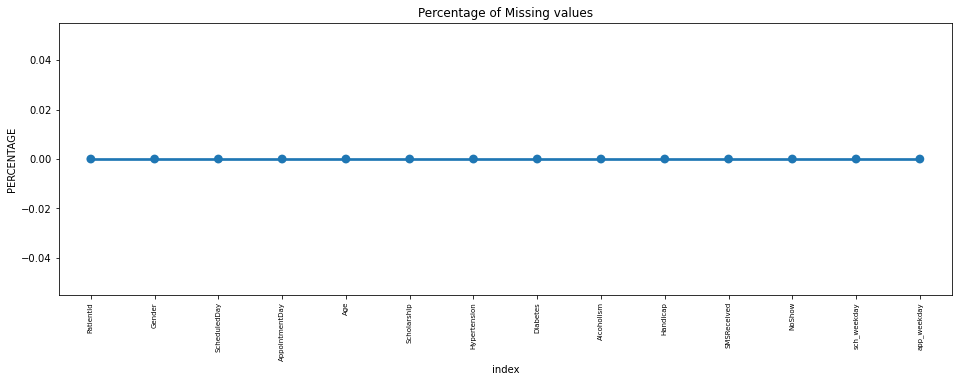

In [137]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# Data Cleaning


In [138]:
new_data = base_data.copy()


In [139]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   Gender          110527 non-null  object             
 2   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Scholarship     110527 non-null  int64              
 6   Hypertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handicap        110527 non-null  int64              
 10  SMSReceived     110527 non-null  int64              
 11  NoShow          110527 non-null  object             
 12  sch_weekday     110527 non-null  int64              
 13  app_weekday   

In [140]:
#As we don't have any null records, there's no data cleaning required

In [141]:
# Get the max tenure
print(base_data['Age'].max()) 

115


In [142]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 122, 20), right=False, labels=labels)

In [143]:
# waiting days between scheduling and appointment
base_data["wait_days"] = (
    base_data["AppointmentDay"].dt.normalize()
    - base_data["ScheduledDay"].dt.normalize()
).dt.days
base_data.head(10)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_group,wait_days
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,4,4,61 - 81,0
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No,4,4,41 - 61,0
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No,4,4,61 - 81,0
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No,4,4,1 - 21,0
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No,4,4,41 - 61,0
5,9.598513e+13,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,No,2,4,61 - 81,2
6,7.336882e+14,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,Yes,2,4,21 - 41,2
7,3.449833e+12,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,Yes,2,4,21 - 41,2
8,5.639473e+13,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,0,0,0,0,0,0,No,4,4,21 - 41,0
9,7.812456e+13,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,No,2,4,1 - 21,2


In [144]:
# negative and extreme ages
print("Min age:", base_data["Age"].min())
print("Max age:", base_data["Age"].max())
print("Negative ages count:", (base_data["Age"] < 0).sum())
print("Age = 0 count:", (base_data["Age"] == 0).sum())

Min age: -1
Max age: 115
Negative ages count: 1
Age = 0 count: 3539


In [145]:
# replace -1 age with +1 
base_data.loc[base_data['Age'] < 0, 'Age'] = 1
print("Min age:", base_data["Age"].min())

Min age: 0


In [146]:
base_data['wait_days'] = base_data['wait_days'].abs()


In [147]:
base_data['AppointmentDay'] = (
    base_data['ScheduledDay'] + pd.to_timedelta(base_data['wait_days'], unit='D')
)


In [148]:
base_data['wait_days'].max()



179

In [149]:
base_data['wait_days'].min()

0

In [150]:
#Age vs No-show: younger patients miss more


In [151]:
base_data["NoShowFlag"] = (base_data['NoShow'] == "Yes").astype(int)


           no_show_rate  num_appointments
Age_group                                
0–17           0.225363             25328
18–29          0.247122             16765
30–44          0.213720             21954
45–59          0.178222             23179
60–74          0.148643             14370
75+            0.161350              5392


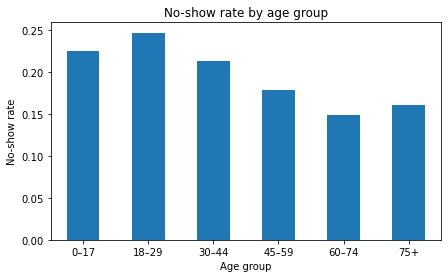

In [152]:
base_data["Age_group"] = pd.cut(base_data["Age"].clip(lower=0), bins=age_bins, labels=age_labels)

age_stats = (
    base_data.groupby("Age_group")["NoShowFlag"]
    .agg(["mean", "count"])
    .rename(columns={"mean": "no_show_rate", "count": "num_appointments"})
)

print(age_stats)

age_stats["no_show_rate"].plot(kind="bar", figsize=(7,4))
plt.ylabel("No-show rate")
plt.xlabel("Age group")
plt.title("No-show rate by age group")
plt.xticks(rotation=0)
plt.show()


In [153]:
base_data['ShowFlag'] = (base_data['NoShow'] == "No").astype(int)


           show_up_rate  num_appointments
Age_group                                
0–17           0.774637             25328
18–29          0.752878             16765
30–44          0.786280             21954
45–59          0.821778             23179
60–74          0.851357             14370
75+            0.838650              5392


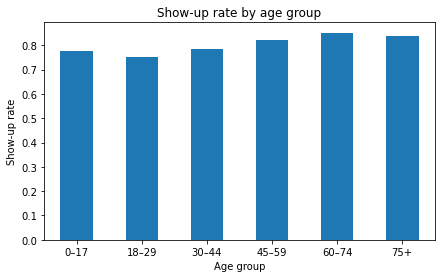

In [154]:
age_stats_show = (
    base_data.groupby("Age_group")["ShowFlag"]
    .agg(["mean", "count"])
    .rename(columns={"mean": "show_up_rate", "count": "num_appointments"})
)

print(age_stats_show)


age_stats_show["show_up_rate"].plot(kind="bar", figsize=(7,4))
plt.ylabel("Show-up rate")
plt.xlabel("Age group")
plt.title("Show-up rate by age group")
plt.xticks(rotation=0)
plt.show()

“No-show behaviour is strongly age-dependent: younger patients (below 30) are more likely to miss appointments compared to older age groups.”

In [155]:
#Patients who comes frequently

In [156]:
base_data.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_group,wait_days,NoShowFlag,ShowFlag
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,4,4,60–74,0,0,1
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No,4,4,45–59,0,0,1
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No,4,4,60–74,0,0,1
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No,4,4,0–17,0,0,1
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No,4,4,45–59,0,0,1


In [157]:
patient_counts = base_data["PatientId"].value_counts()

print(patient_counts.describe())
print("Top 5 most frequent patients:")
print(patient_counts.head())

count    62299.000000
mean         1.774138
std          1.770324
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: PatientId, dtype: float64
Top 5 most frequent patients:
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
Name: PatientId, dtype: int64


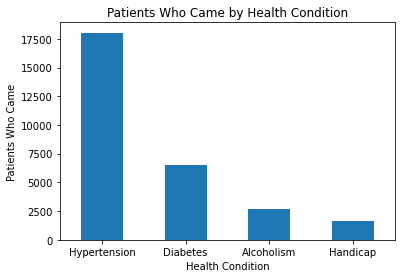

In [169]:
#base_data['ShowFlag'] = (base_data['NoShow'] == "No").astype(int)

conditions = ['Hypertension','Diabetes','Alcoholism','Handicap']

show_counts = {} 

for col in conditions:
    show_counts[col] = base_data.loc[base_data[col] == 1, 'ShowFlag'].sum()
          
show_series = pd.Series(show_counts)


show_series.plot(kind='bar', figsize=(6,4))
plt.ylabel("Patients Who Came")
plt.xlabel("Health Condition")
plt.title("Patients Who Came by Health Condition")
plt.xticks(rotation=0)
plt.show()


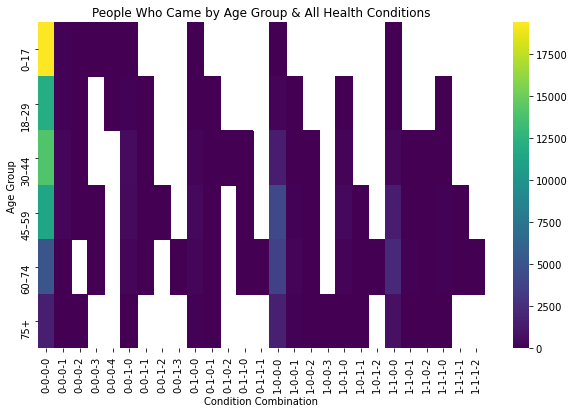

In [178]:
# people who came
base_data['ShowFlag'] = (base_data['NoShow']=='No').astype(int)

# build table
heat = base_data.pivot_table(
    values='ShowFlag',
    index='Age_group',
    columns=['Hypertension','Diabetes','Alcoholism','Handicap'],
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(heat, cmap='viridis')
plt.title("People Who Came by Age Group & All Health Conditions")
plt.xlabel("Condition Combination")
plt.ylabel("Age Group")
plt.show()


In [175]:
base_data.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'NoShow', 'sch_weekday', 'app_weekday', 'Age_group',
       'wait_days', 'NoShowFlag', 'ShowFlag'],
      dtype='object')